In [4]:
import os
import json
import numpy as np
import pandas as pd

def compute_avg_time_across_runs(results_dir, generations=51):
    """
    统计每一代在多个运行结果中的平均 avg_time

    参数:
        results_dir (str): 包含每次 run 子目录的根目录，如 "Results/"
        generations (int): 代数总数，默认 51 表示从第 0 到第 50 代

    返回:
        list: 每一代的平均时间，长度为 generations
    """
    generation_times = [[] for _ in range(generations)]

    # 遍历每个 run 目录（如 run_1, run_2, ..., run_30）
    for run_name in os.listdir(results_dir):
        run_path = os.path.join(results_dir, run_name)
        if not os.path.isdir(run_path):
            continue

        for gen in range(generations):
            json_path = os.path.join(run_path, f"gen_{gen}_log.json")
            if not os.path.isfile(json_path):
                continue
            with open(json_path, "r") as f:
                data = json.load(f)
                avg_time = data.get("avg_time")
                if avg_time is not None:
                    generation_times[gen].append(avg_time)

    # 计算每一代的平均时间
    avg_over_runs = []
    for gen, times in enumerate(generation_times):
        if times:
            avg = np.mean(times)
        else:
            avg = None  # 或设为 0 或 np.nan
        avg_over_runs.append(avg)
        print(f"Generation {gen:02d}: avg_time over {len(times)} runs = {avg:.4f}" if avg is not None else f"Generation {gen:02d}: no valid data")

    return avg_over_runs


results = compute_avg_time_across_runs("Results3", generations=51)

df = pd.DataFrame({
    "Generation": list(range(len(results))),
    "Average_Time": results
})

Generation 00: avg_time over 11 runs = 13594.6687
Generation 01: avg_time over 11 runs = 10922.5138
Generation 02: avg_time over 11 runs = 10383.0891
Generation 03: avg_time over 11 runs = 9402.6783
Generation 04: avg_time over 11 runs = 8783.1808
Generation 05: avg_time over 11 runs = 8508.1815
Generation 06: avg_time over 11 runs = 8283.3074
Generation 07: avg_time over 11 runs = 7977.6220
Generation 08: avg_time over 11 runs = 8204.4883
Generation 09: avg_time over 11 runs = 8084.5124
Generation 10: avg_time over 11 runs = 8088.7047
Generation 11: avg_time over 11 runs = 8044.8818
Generation 12: avg_time over 11 runs = 9112.2415
Generation 13: avg_time over 11 runs = 8505.9577
Generation 14: avg_time over 11 runs = 7995.8686
Generation 15: avg_time over 11 runs = 7940.4457
Generation 16: avg_time over 11 runs = 8264.9155
Generation 17: avg_time over 11 runs = 8134.2738
Generation 18: avg_time over 11 runs = 7577.3964
Generation 19: avg_time over 11 runs = 7909.5088
Generation 20: av

In [5]:
import matplotlib.pyplot as plt

def plot_avg_time_linechart(df, title="Avg Completion Time per Generation"):
    """
    根据DataFrame绘制每一代的平均完成时间折线图

    参数:
        df (DataFrame): 包含 'Generation' 和 'Average_Time' 两列的数据
        title (str): 图表标题
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df["Generation"], df["Average_Time"], marker='o', linewidth=2)
    plt.xlabel("Generation")
    plt.ylabel("Average Completion Time")
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


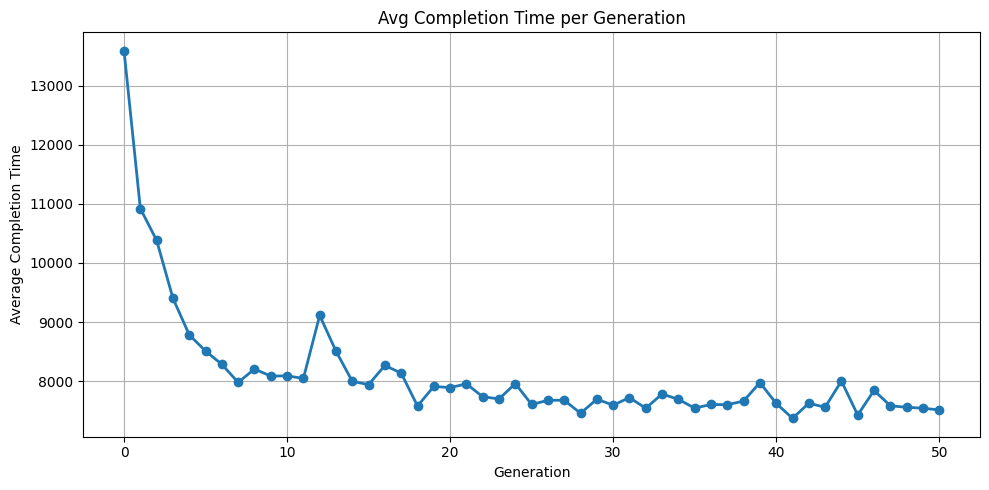

In [6]:
# 假设你已从前面的代码中生成 df
plot_avg_time_linechart(df)
